In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [21]:
data = pd.read_csv("./train.csv")
data.sample(20)

PassengerId  Survived  Pclass  \
593          594         0       3   
737          738         1       1   
326          327         0       3   
577          578         1       1   
247          248         1       2   
165          166         1       3   
687          688         0       3   
745          746         0       1   
431          432         1       3   
490          491         0       3   
710          711         1       1   
618          619         1       2   
193          194         1       2   
612          613         1       3   
615          616         1       2   
530          531         1       2   
183          184         1       2   
759          760         1       1   
213          214         0       2   
675          676         0       3   

                                                  Name     Sex   Age  SibSp  \
593                                 Bourke, Miss. Mary  female   NaN      0   
737                             Lesurer, Mr. Gustave J    male  35.0      0   
326                          Nysveen, Mr. Johan Hansen    male  61.0      0   
577          Silvey, Mrs. William Baird (Alice Munger)  female  39.0      1   
247                    Hamalainen, Mrs. William (Anna)  female  24.0      0   
165    Goldsmith, Master. Frank John William "Frankie"    male   9.0      0   
687                                  Dakic, Mr. Branko    male  19.0      0   
745                       Crosby, Capt. Edward Gifford    male  70.0      1   
431  Thorneycroft, Mrs. Percival (Florence Kate White)  female   NaN      1   
490               Hagland, Mr. Konrad Mathias Reiersen    male   NaN      1   
710   Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  female  24.0      0   
618                        Becker, Miss. Marion Louise  female   4.0      2   
193                         Navratil, Master. Michel M    male   3.0      1   
612                        Murphy, Miss. Margaret Jane  female   NaN      1   
615                                Herman, Miss. Alice  female  24.0      1   
530                           Quick, Miss. Phyllis May  female   2.0      1   
183                          Becker, Master. Richard F    male   1.0      2   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   
213                        Givard, Mr. Hans Kristensen    male  30.0      0   
675                     Edvardsson, Mr. Gustaf Hjalmar    male  18.0      0   

     Parch     Ticket      Fare Cabin Embarked  
593      2     364848    7.7500   NaN        Q  
737      0   PC 17755  512.3292  B101        C  
326      0     345364    6.2375   NaN        S  
577      0      13507   55.9000   E44        S  
247      2     250649   14.5000   NaN        S  
165      2     363291   20.5250   NaN        S  
687      0     349228   10.1708   NaN        S  
745      1  WE/P 5735   71.0000   B22        S  
431      0     376564   16.1000   NaN        S  
490      0      65304   19.9667   NaN        S  
710      0   PC 17482   49.5042   C90        C  
618      1     230136   39.0000    F4        S  
193      1     230080   26.0000    F2        S  
612      0     367230   15.5000   NaN        Q  
615      2     220845   65.0000   NaN        S  
530      1      26360   26.0000   NaN        S  
183      1     230136   39.0000    F4        S  
759      0     110152   86.5000   B77        S  
213      0     250646   13.0000   NaN        S  
675      0     349912    7.7750   NaN        S

<AxesSubplot:xlabel='Sex'>

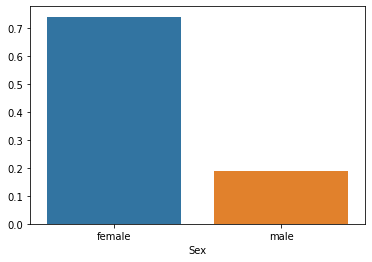

In [5]:
#Est ce que la variable homme/femme a un impact sur le taux de survie ?
gb = data.groupby("Sex")["Survived"].mean()
sns.barplot(x = gb.index, y = gb.values)

<AxesSubplot:xlabel='no_cabin'>

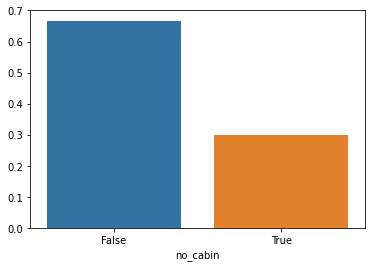

In [9]:
data["no_cabin"] = data["Cabin"].isna()
#Est ce que la variable has_cabin a un impact sur le taux de survie ?
gb = data.groupby("no_cabin")["Survived"].mean()
sns.barplot(x = gb.index, y = gb.values)

<AxesSubplot:xlabel='age_uknown'>

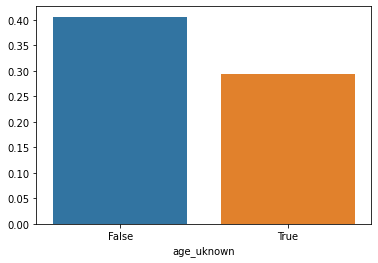

In [15]:
data["age_uknown"] = data["Age"].isna()
gb = data.groupby("age_uknown")["Survived"].mean()
sns.barplot(x = gb.index, y = gb.values)

<AxesSubplot:xlabel='decade', ylabel='Survived'>

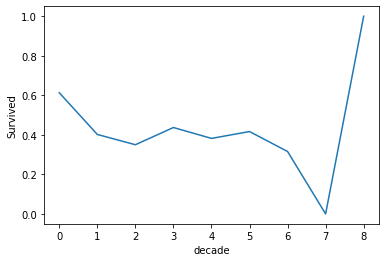

In [20]:
data["decade"] = data["Age"] // 10
gb = data.groupby("decade")["Survived"].mean()
sns.lineplot(gb)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

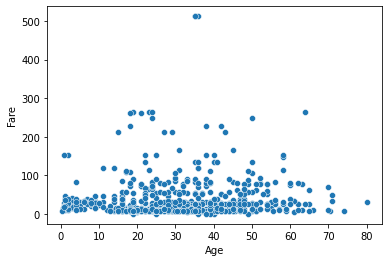

In [23]:
sns.scatterplot(x = data["Age"], y = data["Fare"])

<AxesSubplot:xlabel='name_length'>

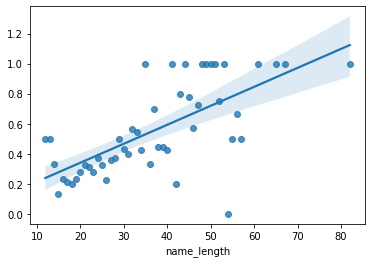

In [27]:
data["name_length"] = data["Name"].apply(lambda x : len(x))
gb = data.groupby("name_length")["Survived"].mean()
sns.regplot(x=gb.index, y=gb.values)

<AxesSubplot:xlabel='word_count'>

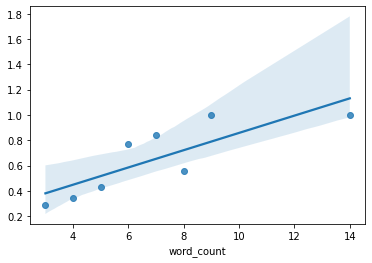

In [29]:
data["word_count"] = data["Name"].apply(lambda x : len(x.split()))
gb = data.groupby("word_count")["Survived"].mean()
sns.regplot(x=gb.index, y=gb.values)

<AxesSubplot:xlabel='currency', ylabel='Survived'>

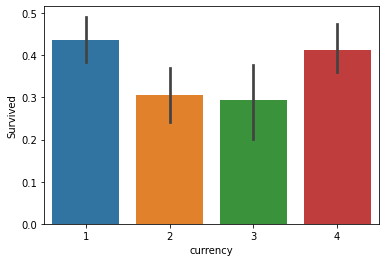

In [39]:
data["currency"] = data["Fare"].apply(lambda x : len(str(float(x)).split(".")[1]))
sns.barplot(data = data, x="currency", y="Survived")
